# Machine Learning: Decision Tree

In [1]:
import numpy as np
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
% matplotlib inline

# Decision Trees?

A decision support tool that uses a **tree-like graph** or model of decisions and their possible consequences.

Decision trees are built by **repeatedly splitting training data into smaller and smaller samples**

Decision trees encode a **series of "if" and "else" choices**, similar to how a person might make a decision.

However, which questions to ask, and how to proceed for each answer is entirely **learned from the data**

## Vocab:

* Nodes
    * “test” on an attribute
    * Split for the value of a certain attribute
    * each internal (non-leaf) node is labeled with an input feature; each split is "simple"


* Splitting
    * process of dividing a node into two or more sub-nodes
    * the opposite is called pruning (remove sub-nodes of a decision node)


* parent node
    * node divided into sub-nodes
    
    
* child node
    * sub-nodes are the child of parent node


* Edges
    * Outcome of a split to next node
    * conjunctions of features that lead to those class labels
    * terminology: *branch to a child node picked by the decision rule at parent node*


* Root (root node)
    * The node that performs the first split
    * begins with all the training data


* Decision Node
    * When a sub-node splits into further sub-nodes


* Leaves (leaf nodes)
    * Terminal nodes that predict the outcome, i.e. labels for target variable, i.e. class labels
    * nodes that do not split


* Decision tree
    * pass data down from a root node to leaves
        * paths from root to leaf represent decision taken after computing all attributes


* Classification trees 
    * decision trees; target variable can take a discrete set of values


* Regression trees
    * decision trees; target variable can take continuous values

*The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision* 
* Niklaus Wirth, Programming language designer

## Decision Tree Classification

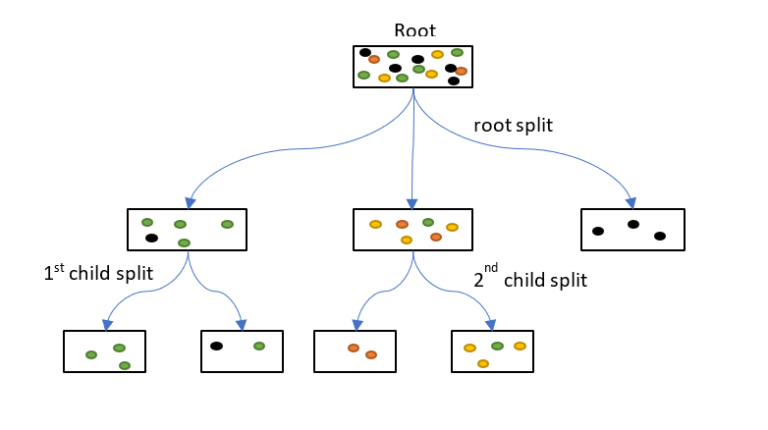

In [2]:
from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/decision-tree-illustration.png',
      width=700)

# coloured dots indicate classes which will eventually be separated by the decision tree
# root => one predictor variable is chosen to make split
# At every node, a set of possible split points is identified for every predictor variable

How to keep splits simple?

* by restricting the number of children per node (binary vs. n-ary decision tree)
    * multi-way splits are computationally costly
    * for practical reasons (combinatorial explosion) most libraries implement decision trees with binary splits
    * *n-ary splits can be represented as a tree of binary splits*
    
    
* by restricting the number of variables used per split (univariate vs. multivariate decision tree)

## Binary classification trees

* binary trees
    * each node corresponds to a question asked about the data
   
   
* e.g. fictional task: 
    * distinguish: hawks, penguins, dolphins, and bears
        * series of binary questions that will lead to which animal it might be 
            * i.e. narrow down the outcomes


* (with continuous features, you question them via thresholds)

=> assigning the majority class in that leaf to all points within a leaf 

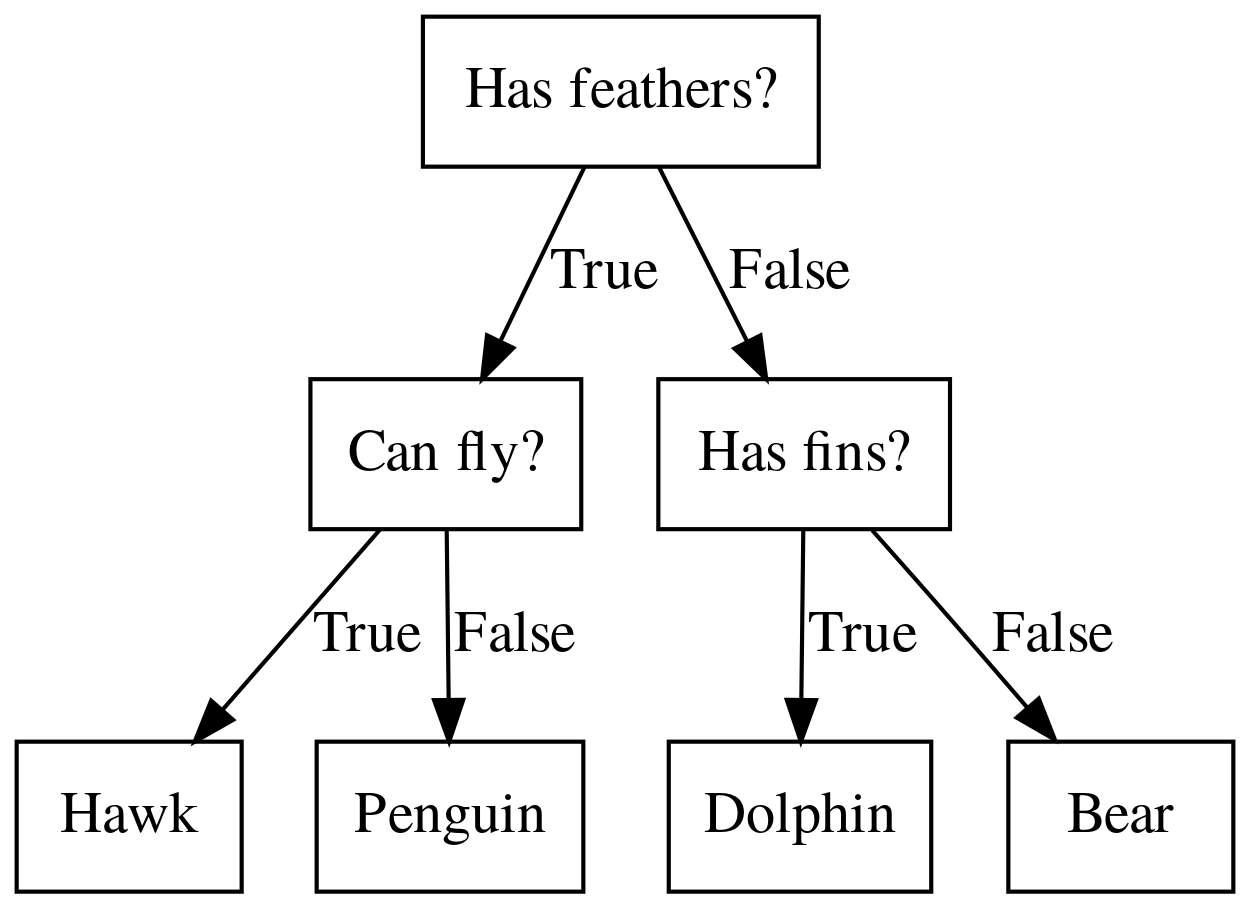

In [3]:
from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/tree_illustration.png', 
      width=500)

The simplest **parameter** that helps form a tree is:

* **maximum_depth**:

    * limits how finely the tree can partition the input space
    * **how many "if-else" questions can be asked** before deciding which class a sample lies in
    * important to tune for trees and tree-based models

## e.g. binary classification problem

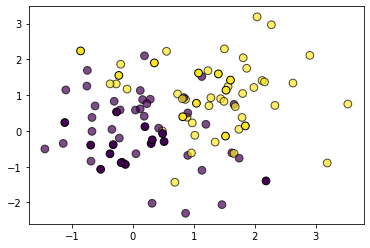

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=1, n_samples=100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)

X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, alpha=.7, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60, edgecolor='k')

# ``max_depth``

In [5]:
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
def building_trees_kh(maxdepth = 1):
    
    from sklearn.tree import DecisionTreeClassifier
    # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    clf = DecisionTreeClassifier(max_depth=maxdepth)
    clf.fit(X_train, y_train)
    
    plt.subplots(1, 2, figsize=(10, 5))
    plt.subplot(1, 2, 1) ########## LEFT ##########
    eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    # 'DecisionTreeClassifier' object has "predict_proba"
    decision_values = clf.predict_proba(X_grid)[:, 1]
    levels = [.5]
    fill_levels = [0, .5, 1]
    # if model is a regressor
    # decision_values = model.decision_function(X_grid)
    # levels = [0]
    # fill_levels = [decision_values.min(), 0, decision_values.max()]

    ax = plt.gca()
    ax.contourf(X1, X2, decision_values.reshape(X1.shape), levels=fill_levels, colors=['lightblue', 'peachpuff'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, alpha=.7, edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60, edgecolor='k')
    plt.title("depth = {0}".format(maxdepth))

    plt.subplot(1, 2, 2) ########## RIGHT ##########
    from sklearn import tree
    tree.plot_tree(clf, max_depth = maxdepth, impurity = False, filled = True, label = "root")
    # https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
    
    plt.tight_layout()

#### regions are assigned colours to indicate the predicted class for that region

#### ``max_depth`` of 1 is an underfit model

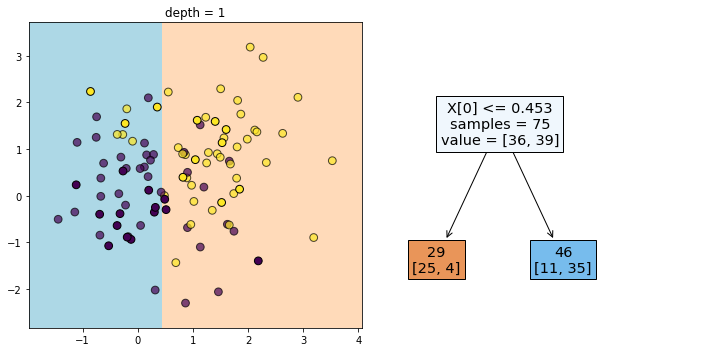

In [7]:
building_trees_kh(1)

#### thresholding a single feature

* The first line in tree asks: if "X" < decision boundary, for every data point.
    * i.e. **what classification should this data point be assigned**
    * how well does this boundary separate the two classes
    * learning: axis parallel hyperplane
    * 'value' row in each node = number of points assigned to each class
    * 'samples' row in root node is number of points we have trained on (default of train_test_split is 75% into training)
    
    
* how decision boundary is known?
    * **find the best feature and the best threshold to minimize impurity**
        * greatest improvement in purity
        * i.e. tries to make the resulting subsets, the two halves in the above, to be as "pure" as possible 
        * (to consist mostly of one class - i.e. homogeneous wrt the outcome variable)
            * searching over all possible features and all possible thresholds
                * thresholds are all values of the feature that we're observing - iterating over each feature & ask "is this a good way to split the data set into two classes"
                    * i.e. **shapes = squares (at each split, only one feature involved)**

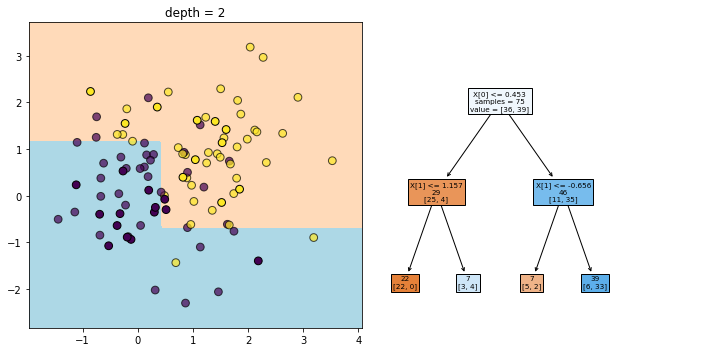

In [8]:
building_trees_kh(2)

#### repeats, iterates recursively

* find the best feature and the best threshold to minimize impurity, for each of the two classes
    * i.e. model will predict accordingly, further separate the points into the two classes
    
    
* i.e. **recursive partitioning** 

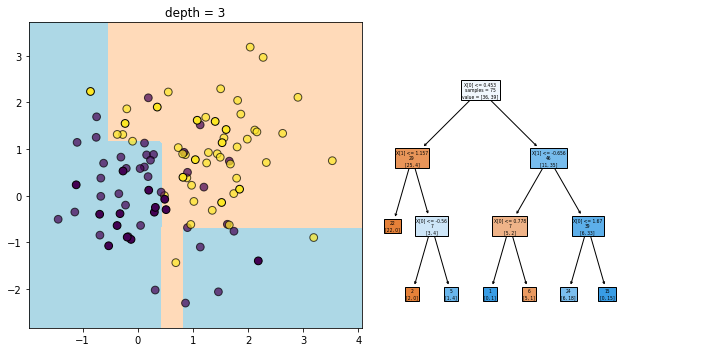

In [9]:
building_trees_kh(3)

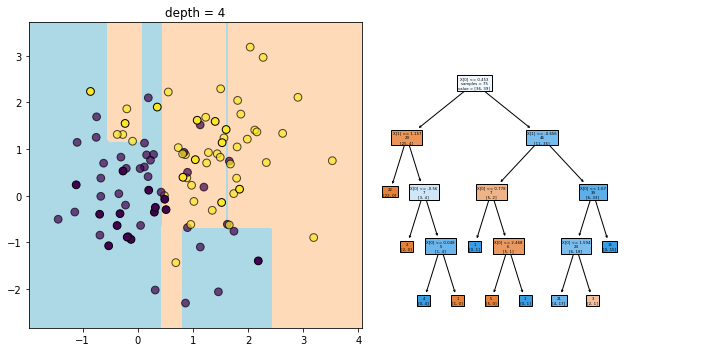

In [10]:
building_trees_kh(4)

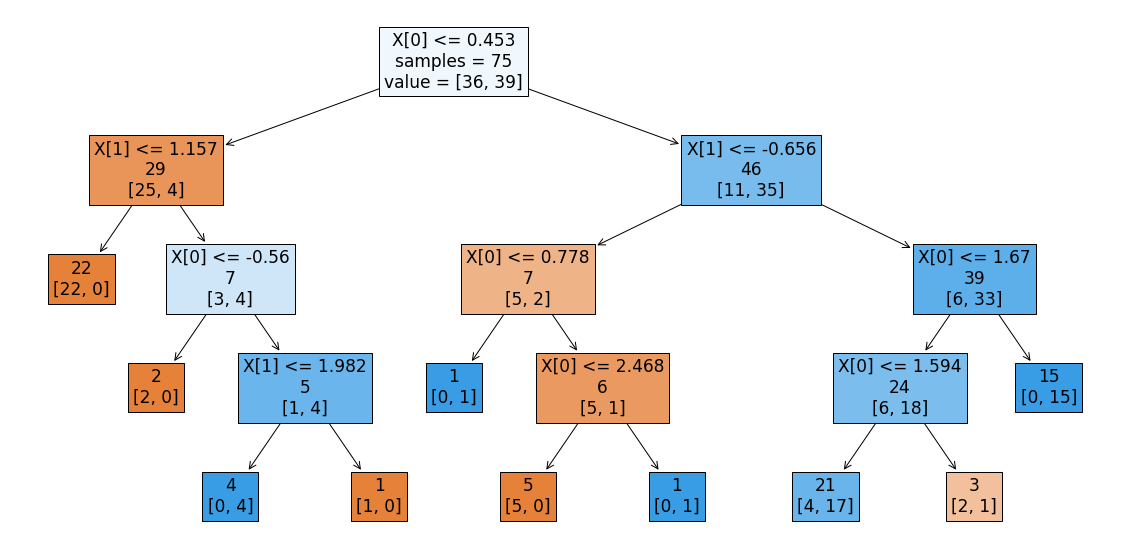

In [11]:
# Zoom in on the tree
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(clf, max_depth = 4, impurity = False, filled = True, label = "root")
plt.show()

#### If only one class remain after a split, 
* **the tree will not add any splits/nodes since the leaves have become pure**
* NB: tree building algorithms start greedily building a tree:
    * do not go back and revisit - because computationally expensive
    * top-down induction of decision trees

* ``max_depth`` of 9 is an overfit model

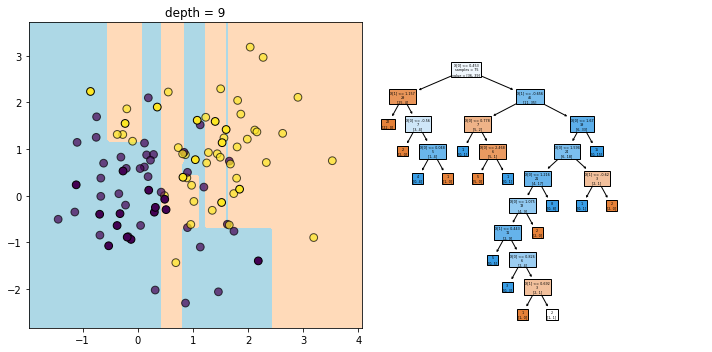

In [12]:
building_trees_kh(9)

#### "pure"

This dataset => when maximum depth of tree = 9 => leaves commence to contain samples from a single class (aka "pure")

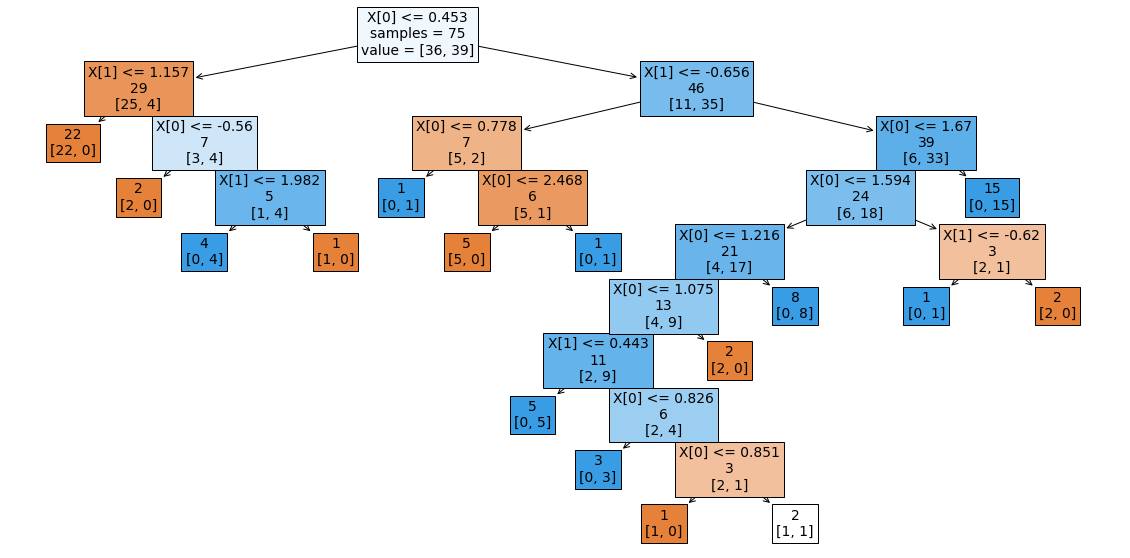

In [13]:
# Zoom in on the tree
clf = DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(clf, max_depth = 9, impurity = False, filled = True, label = "root")
plt.show()

### Criteria (for Classification): Measures of "impurity": 

* i.e. **method of choosing best split**

* we want to quantify the split

    * e.g. "low" if all data in one class (pure node)

* criterion parameter of sklearn.tree.DecisionTreeClassifier:
    * “gini” = Gini impurity [default]
    * “entropy” = information gain [computationally intensive, due to log]

- Gini Index:

    *  faster / default / preferred

        * $$H_\text{gini}(X_m) = \sum_{k\in\mathcal{Y}} p_{mk} (1 - p_{mk})$$

    * **probability of incorrectly classifying** a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset.
        * degree of Gini index varies between 0 and 1
            * minimum (zero) when all cases in the node fall into a single target category (all elements belong to a certain class)
            * 1 denotes that the elements are randomly distributed across various classes

- Cross-Entropy:

    * degree of uncertainty, impurity or disorder
    * (over classes) 
    * (want to minimise)

$$H_\text{CE}(X_m) = -\sum_{k\in\mathcal{Y}} p_{mk} \log(p_{mk})$$

$X_m$ observations in node m

$\mathcal{Y}$ classes

$p_{m\cdot}$ distribution over classes in node m [i.e. fraction of points belonging to class]


* which to choose?
    * https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf

# Decision trees

+ve:

* fast to train
* easy to understand (predicts most common class in leaf, after traverse tree from top to bottom)
- intuitive -> commonly used models both for classification and regression (popular in industry)
- invariant to scaling of the features --> less preprocessing
- distribution of the data is not important 
- easy to handle: categorical variables, missing values
- can build stronger models, by combining multiple trees
- non paramteric (tree model can become more and more flexible, if given more data) (number of free parameters grows with the number of samples)
- non linear
- easy to interpret

-ve

* tend to overfit the training data


in practice => combine multiple trees => models that generalize 

* random forests
* gradient boosted trees


### Further Reading:

* The sklearn.tree module includes decision tree-based models for classification and regression:
    * https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
    

* User Guide:
    * https://scikit-learn.org/stable/modules/tree.html


* Iris Example:
    * https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py


* sklearn.tree.plot_tree documentation:
    * https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

## Decision Tree Regression

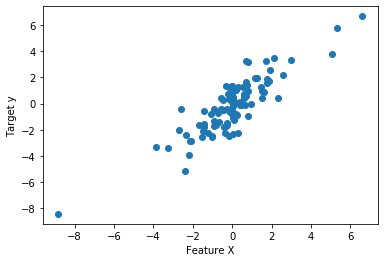

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-3, +3, 100) * + np.random.randn(100)
y = X + np.random.randn(100)
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.scatter(X, y);

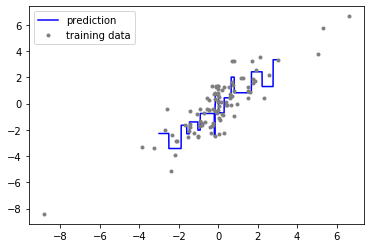

In [15]:
X = X.reshape(-1, 1)

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X, y)

X_fit = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_fit_1 = reg.predict(X_fit)

plt.figure()
plt.plot(X_fit.ravel(), y_fit_1, color='blue', label="prediction")
plt.plot(X.ravel(), y, 'C7.', label="training data")
plt.legend(loc="best");

* long flat lines => bias / underfitting data
* narrow spikes => high variance / over-fits the data


* more flexible than linear regression

### Prediction

$$\bar{y}_m = \frac{1}{N_m} \sum_{i \in N_m} y_i $$

### Criteria (impurity):

Mean Squared Error: (penalise with the square norm)

$$ H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} (y_i - \bar{y}_m)^2 $$

Mean Absolute Error: (penalise with the L1 norm)

$$ H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} |y_i - \bar{y}_m| $$


* use regression to partition or split and then determine how good the mean prediction is

    * for each possible split, you can compute the mean for the two resulting nodes and you compute how well the mean in each leaf predicts.

NB: trees are deeper, if unrestricted (due to distinct targets of numbers)